<a href="https://colab.research.google.com/github/Caio-Oliveira98/Computa-o-Neurom-rfica/blob/main/Simula%C3%A7%C3%A3o_LIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔬 Simulação do Neurônio de Integração e Disparo com Vazamento (LIF)

Esta simulação em Python representa a Prova de Conceito (POC) do seu projeto de computação neuromórfica. Ela modela a dinâmica de um neurônio LIF como um circuito RC, demonstrando os processos de **integração**, **vazamento** e **disparo** (spike). A eficiência energética deste modelo é a base da discussão sobre o Futuro do Trabalho.

In [2]:
# 1. Instalação (Geralmente não é necessária no Colab, mas bom para garantir)
# !pip install numpy matplotlib

# Importações
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# --- 2. Parâmetros do Circuito RC/Neurônio LIF ---
# Os valores estão em unidades base (Ohms, Farads, Volts, Amperes)
R = 10 * (10**6)    # Resistência (R) em Ohms (10 MOhms)
C = 1 * (10**-9)    # Capacitância (C) em Farads (1 nF)
tau = R * C         # Constante de tempo (tau) em segundos

V_rest = 0          # Potencial de Repouso em Volts
V_th = 0.015        # Limiar de Disparo (Threshold) em Volts (15 mV)
V_reset = 0         # Potencial de Reset (após o disparo) em Volts
I_in = 2 * (10**-9) # Corrente de Entrada (I) em Amperes (2 nA)

# --- 3. Parâmetros da Simulação Temporal ---
dt = 0.0001         # Passo de tempo (deltat) em segundos (0.1 ms)
T_max = 0.05        # Tempo total da simulação em segundos (50 ms)

# --- 4. Inicialização dos Vetores ---
t = np.arange(0, T_max, dt)
V = np.zeros_like(t) # Inicializa o vetor de potenciais de membrana
V[0] = V_rest        # Tensão inicial é o potencial de repouso
spikes = np.zeros_like(t) # Vetor para registrar os disparos

# --- 5. Loop Principal: Simulação e Dinâmica do LIF ---
for i in range(1, len(t)):
    # Equação do LIF discretizada: dV/dt = -(V - V_rest)/tau + R*I_in/tau
    dVdt = (-(V[i-1] - V_rest) / tau) + (R * I_in / tau)

    # Atualiza o Potencial usando o método de Euler
    V[i] = V[i-1] + dVdt * dt

    # Condição de Disparo (Se atingir o Limiar):
    if V[i] >= V_th:
        V[i] = V_reset # Reseta o potencial de membrana
        spikes[i] = 1  # Marca o disparo (para fins de registro)

print(f"Parâmetros: R={R/10**6:.1f} MΩ, C={C*10**9:.1f} nF. Constante de tempo τ = {tau*1000:.1f} ms.")

Parâmetros: R=10.0 MΩ, C=1.0 nF. Constante de tempo τ = 10.0 ms.


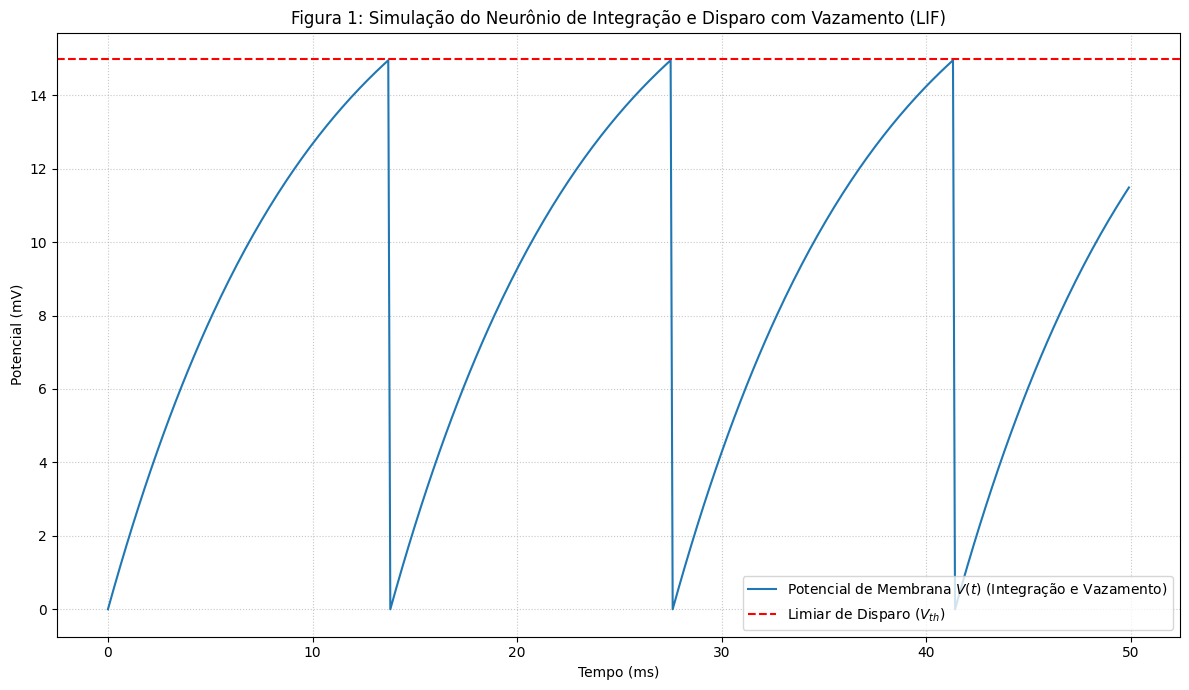

In [4]:
# --- 6. Visualização dos Resultados ---
plt.figure(figsize=(12, 7))

# Plota o potencial, convertendo tempo para ms e potencial para mV
plt.plot(t * 1000, V * 1000, label='Potencial de Membrana $V(t)$ (Integração e Vazamento)')

# Linha pontilhada vermelha para o Limiar de Disparo
plt.axhline(V_th * 1000, color='r', linestyle='--', label='Limiar de Disparo ($V_{th}$)')

plt.title('Figura 1: Simulação do Neurônio de Integração e Disparo com Vazamento (LIF)')
plt.xlabel('Tempo (ms)')
plt.ylabel('Potencial (mV)')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.tight_layout()

# Exibe o gráfico no Colab
plt.show()